# Color transfomation of slides

In [2]:
import slideio
from utils import get_test_images, display_test_image_info, show_images, show_image, get_driver_test_images, delete_file, show_scenes, show_scene_info, show_scene_info_tables, create_output_file_path

# Overview
Changing the color space of an image is a fundamental step in image analysis that holds significant importance. The choice of color space can greatly impact the interpretability and effectiveness of various analysis techniques. By converting an image to a different color space, we can manipulate and represent the image data in a more meaningful way, enabling us to extract valuable insights and patterns that might be obscured in the original color space. Different color spaces offer unique advantages for specific analysis tasks. 

In the context of the **SlideIO** library, the transformer function provides a convenient way to change the color space of an image. With this function, users can easily convert an image from the RGB color space to other popular color spaces such as grayscale, HSV, HLS, and more. This flexibility allows researchers and analysts to explore different color representations and leverage the advantages offered by each color space. For example, transforming an image to grayscale simplifies the image representation, emphasizing intensity variations and facilitating edge detection. Similarly, converting to the HSV color space separates hue, saturation, and value components, enabling more targeted analysis of color-related features. 

By incorporating the color space transformation capabilities of SlideIO, users have the freedom to adapt their image analysis workflow to specific requirements and leverage the power of different color representations. This flexibility enhances the accuracy and effectiveness of image analysis tasks, empowering researchers to uncover deeper insights and extract valuable information from their pathology images.

This tutorial shows how to use color transformation in **SlideIO**.

The **transform_scene(scene, params)** function in SlideIO provides a powerful tool for color modification of pathology images. This function takes two parameters: `scene`, which represents the original scene selected for color modification, and `params`, an instance of the `slideio.ColorTransformation` class that specifies the target color space.

In SlideIO, the color space is defined by the `slideio.ColorSpace` class, which offers various options for color representations. The available color space values include `ColorSpace.GRAY`, `ColorSpace.HSV`, `ColorSpace.HLS`, `ColorSpace.YUV`, `ColorSpace.YCbCr`, `ColorSpace.Luv`, `ColorSpace.Lab`, and `ColorSpace.XYZ`.

By passing the desired color space as a parameter, users can transform the color representation of the input scene to the specified target color space. This transformation allows researchers and analysts to explore and analyze pathology images using different color models, each offering unique advantages for specific analysis tasks.

For example, converting an image to grayscale (`ColorSpace.GRAY`) simplifies the image representation by removing color information and focusing solely on intensity variations. This can be useful for tasks such as edge detection or quantifying grayscale-based features.

Similarly, transforming an image to the HSV color space (`ColorSpace.HSV`) separates hue, saturation, and value components, enabling more targeted analysis of color-related features and facilitating tasks such as color segmentation or object tracking.

By utilizing the **transform_scene** function in **SlideIO**, users have the flexibility to adapt the color representation of pathology images to match their specific analysis requirements. This capability enhances the versatility and effectiveness of image analysis tasks, empowering researchers to gain deeper insights and extract valuable information from their pathology images.

The **transform_scene** function in **SlideIO** returns an instance of the **Scene** object, which can be used in the same way as a regular **Scene** object for reading the raster data. The returned **Scene** object retains all the properties and methods of a standard **Scene** object, allowing users to access the pixel data, retrieve metadata, and perform other image analysis tasks. However, the pixel data will be returned in the modified color space.

**Note: SlideIO supplorts color conversion for 3 channel 8 bit images only**

## Load original scene

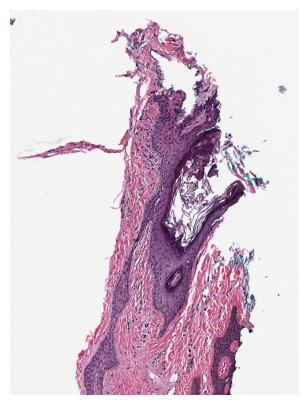

In [3]:
# Load input scene from a scn file
input_path =  get_driver_test_images("SVS")[0]
scene = slideio.open_slide(input_path, 'AUTO').get_scene(0)
# Display scene information
show_scene_info(scene)
show_image(scene.read_block(), 500)

## Transform the color space

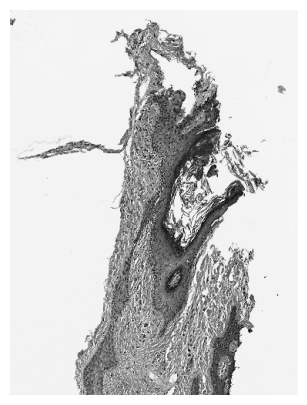

In [4]:
params = slideio.ColorTransformation()
params.color_space = slideio.ColorSpace.GRAY
transformed_scene = slideio.transform_scene(scene, params)
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Iterate through all supported color spaces

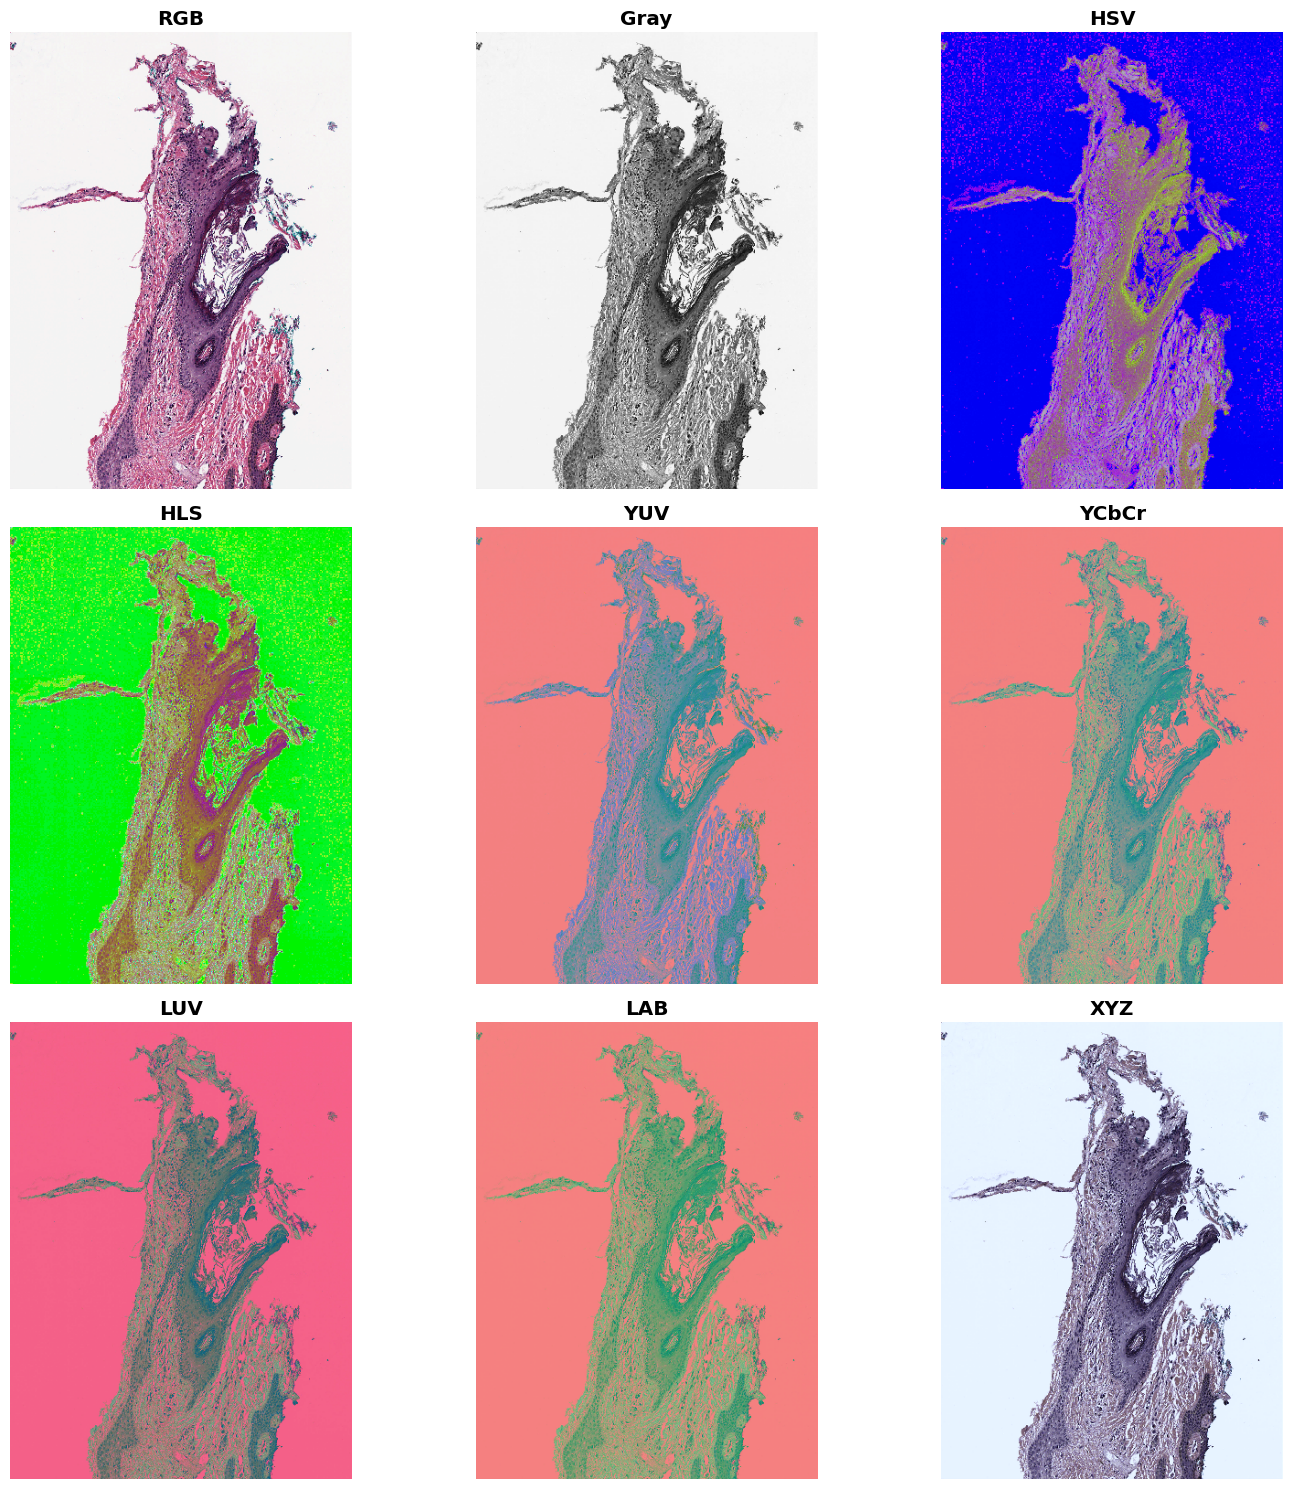

In [5]:
color_spaces = [(slideio.ColorSpace.GRAY, "Gray"), (slideio.ColorSpace.HSV, "HSV"),
                (slideio.ColorSpace.HLS, "HLS"), (slideio.ColorSpace.YUV,"YUV"),
                (slideio.ColorSpace.YCbCr, "YCbCr"), (slideio.ColorSpace.Luv, "LUV"),
                (slideio.ColorSpace.Lab,"LAB"), (slideio.ColorSpace.XYZ,"XYZ")]
titles = ["RGB"]
images = [scene.read_block(size=(0,500))]

params = slideio.ColorTransformation()
for space in color_spaces:
    color_space = space[0]
    title = space[1]
    params.color_space = color_space
    transformed_scene = slideio.transform_scene(scene, params)
    image = transformed_scene.read_block(size=(0,500))
    titles.append(title)
    images.append(image)
show_images(images, titles, 500, 3)

## Convinience method **apply_transformation**
It is possible to use a convinience method of **Scene** object **apply_transformation** which uses a single parameter: instance of the class **ColorTransformation** that describes the transformation.

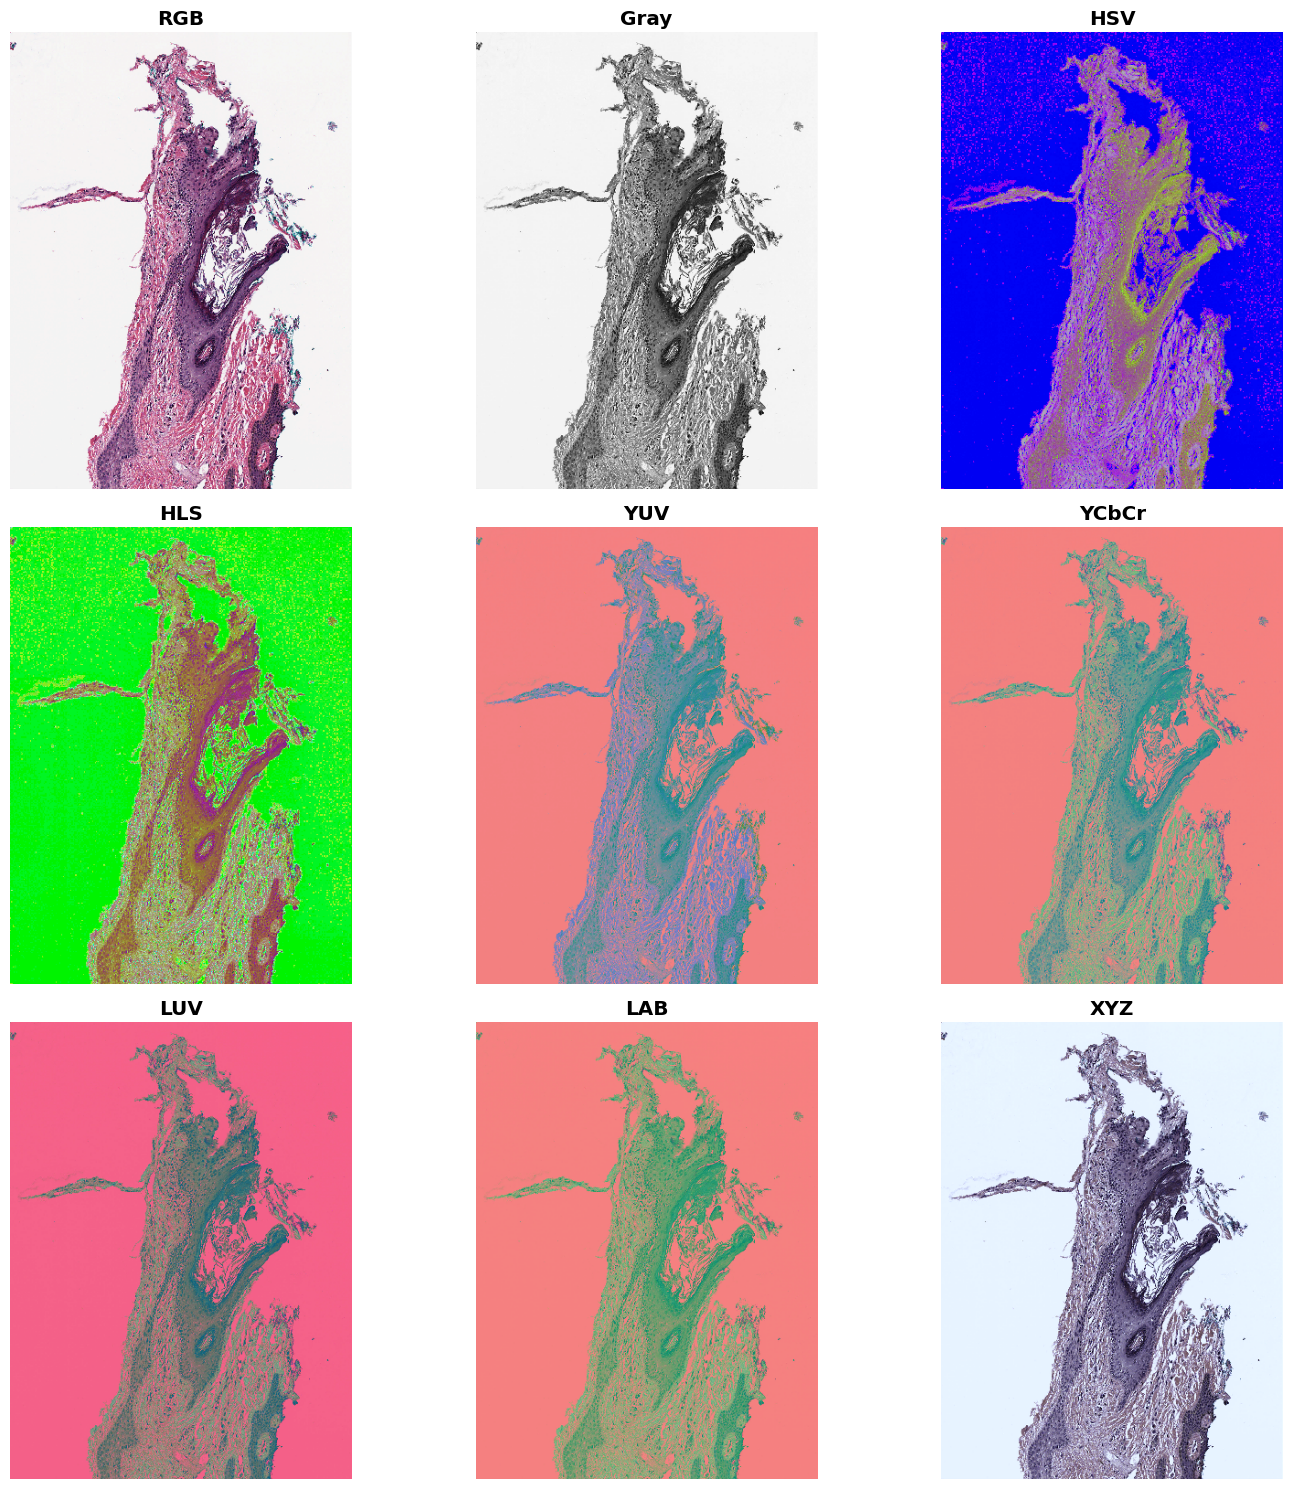

In [6]:
color_spaces = [(slideio.ColorSpace.GRAY, "Gray"), (slideio.ColorSpace.HSV, "HSV"),
                (slideio.ColorSpace.HLS, "HLS"), (slideio.ColorSpace.YUV,"YUV"),
                (slideio.ColorSpace.YCbCr, "YCbCr"), (slideio.ColorSpace.Luv, "LUV"),
                (slideio.ColorSpace.Lab,"LAB"), (slideio.ColorSpace.XYZ,"XYZ")]
titles = ["RGB"]
images = [scene.read_block(size=(0,500))]

params = slideio.ColorTransformation()
for space in color_spaces:
    color_space = space[0]
    title = space[1]
    params.color_space = color_space
    transformed_scene = scene.apply_transformation(params)
    image = transformed_scene.read_block(size=(0,500))
    titles.append(title)
    images.append(image)
show_images(images, titles, 500, 3)